In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings

In [186]:
#From qutip.org
def hamiltonian(N, Ec, Ej, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

In [187]:
#parameters
N=10
Ec=1
Ej = 1
lvl_num = 5
ng_array = np.linspace(-2,2,401)
energies = np.zeros((len(ng_array), 2*N+1))

In [188]:
#Spectrum
for idx_ng, ng in enumerate (ng_array):
    energies[idx_ng,:] = hamiltonian(N, Ec, Ej, ng).eigenenergies()  

Text(0, 0.5, 'Frequency (GHz)')

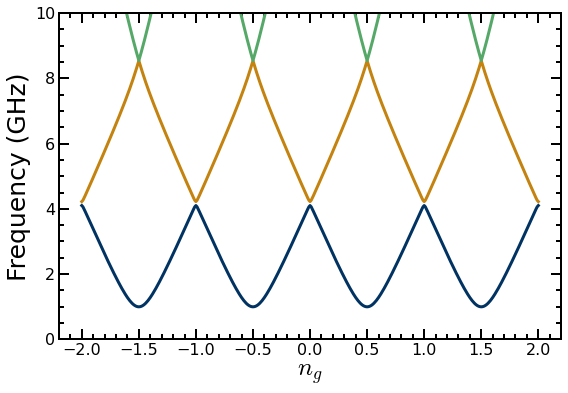

In [189]:
plt.figure(figsize=[9,6])
for idx_lvl in range(1,N):
    plt.plot(ng_array, energies[:,idx_lvl]-energies[:,0])
plt.ylim([0,10])
plt.xlabel('$n_g$')
plt.ylabel('Frequency (GHz)')

In [190]:
#Wavefunctions in charge basis
ng = 0
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian(N, Ec, Ej, ng).eigenstates()   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0, 0.5, '$\\langle n|$3$ \\rangle $')

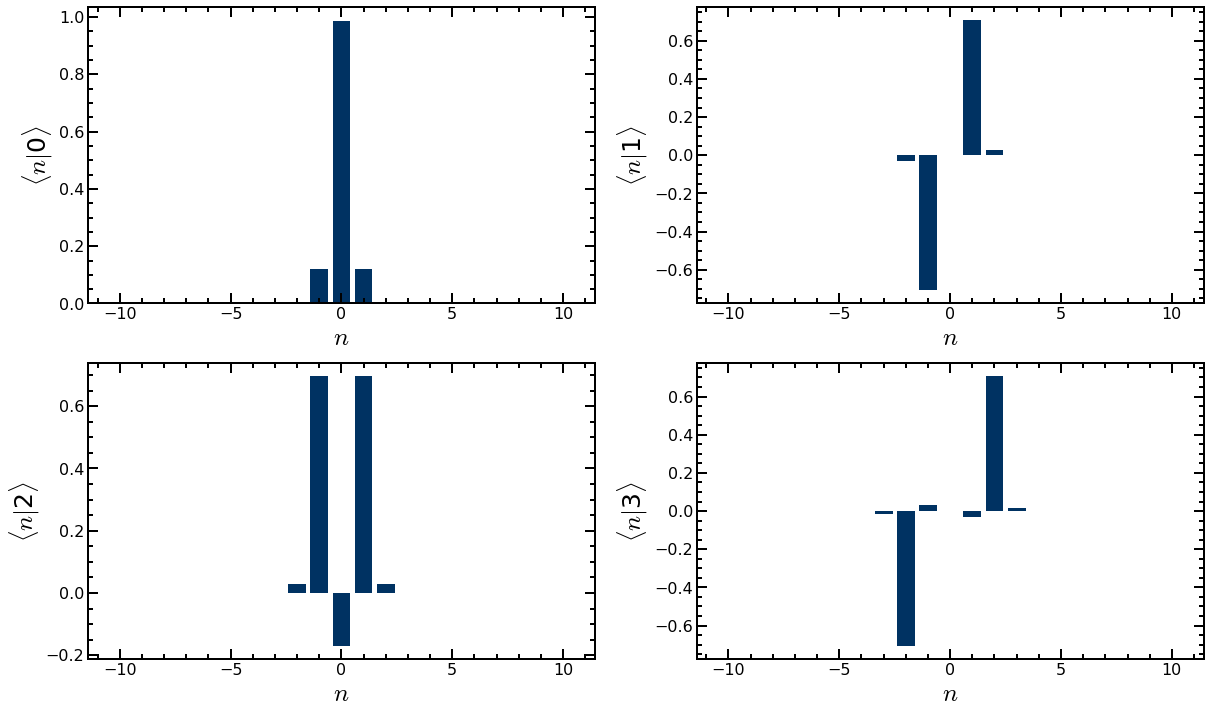

In [191]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(2,2, figsize = [20,12])

state_to_plot = 0
ax[0,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,0].set_xlabel('$n$')
ax[0,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 1
ax[0,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,1].set_xlabel('$n$')
ax[0,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 2
ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,0].set_xlabel('$n$')
ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 3
ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,1].set_xlabel('$n$')
ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

In [192]:
ng = 0.5
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian(N, Ec, Ej, ng).eigenstates()   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0, 0.5, '$\\langle n|$3$ \\rangle $')

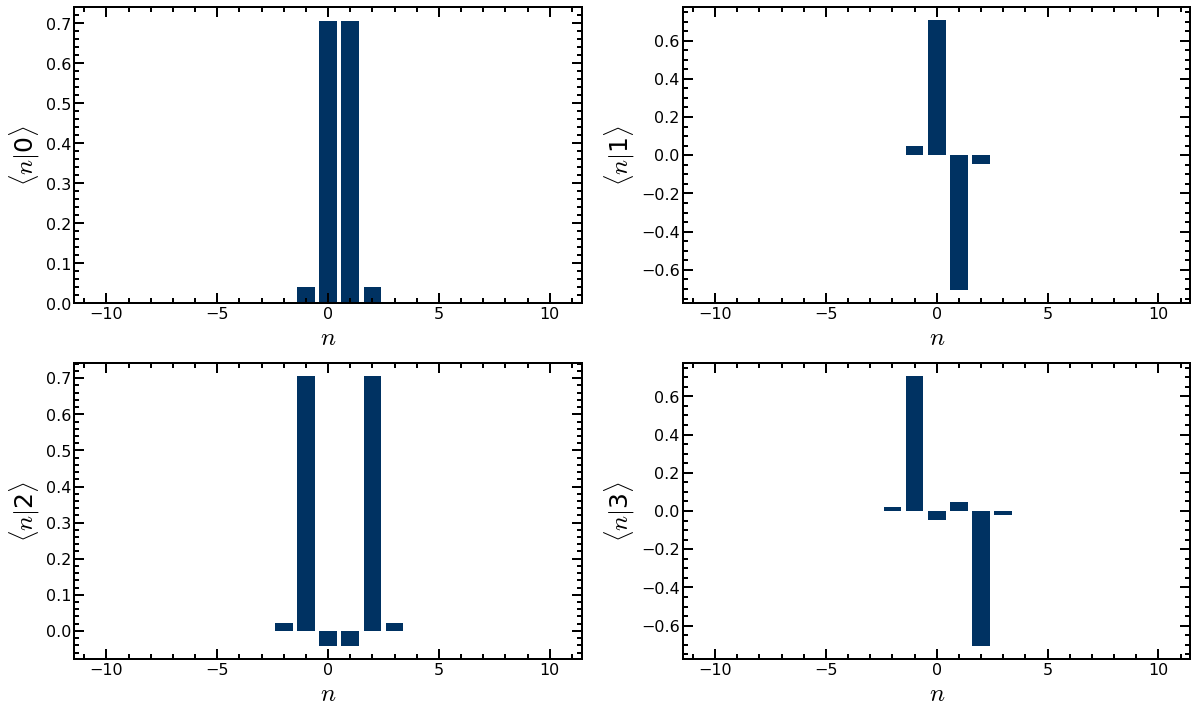

In [193]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(2,2, figsize = [20,12])

state_to_plot = 0
ax[0,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,0].set_xlabel('$n$')
ax[0,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 1
ax[0,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,1].set_xlabel('$n$')
ax[0,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 2
ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,0].set_xlabel('$n$')
ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 3
ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,1].set_xlabel('$n$')
ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

In [194]:
#Charge matrix elements
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(ng_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_ng] = n.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$n_\\mathrm{ij}$')

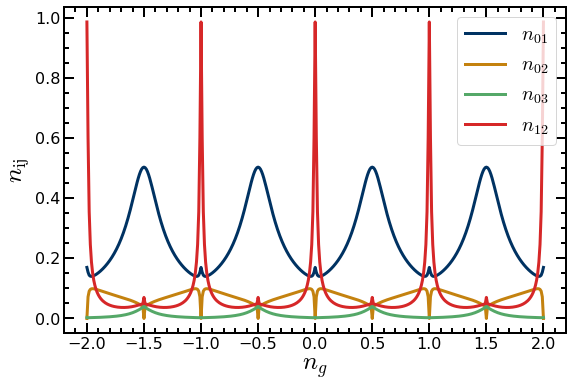

In [195]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(ng_array, abs(charge_matrix_element_02), label = '$n_{02}$')
plt.plot(ng_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(ng_array, abs(charge_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$n_\mathrm{ij}$')

In [196]:
#Phase matrix elements
phi = np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1)
phi = Qobj(phi)
phi_matrix_element_01 = np.zeros_like(charge_matrix_element_01)
phi_matrix_element_02 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_03 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_12 = np.zeros_like(phi_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian(N, Ec, Ej, ng).eigenstates()   
    phi_matrix_element_01[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[1])
    phi_matrix_element_02[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[2])
    phi_matrix_element_03[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[3])
    phi_matrix_element_12[idx_ng] = phi.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$\\phi_\\mathrm{ij}$')

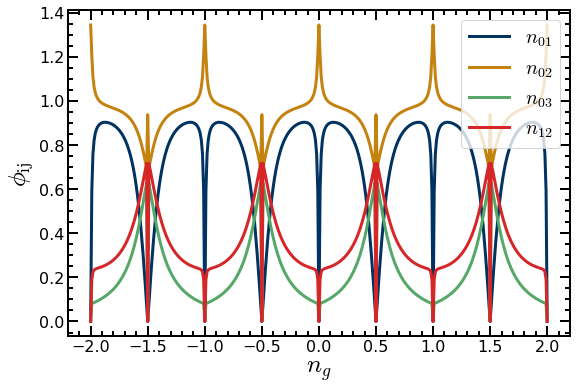

In [197]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(phi_matrix_element_01), label = '$n_{01}$')
plt.plot(ng_array, abs(phi_matrix_element_02), label = '$n_{02}$')
plt.plot(ng_array, abs(phi_matrix_element_03), label = '$n_{03}$')
plt.plot(ng_array, abs(phi_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$\phi_\mathrm{ij}$')

In [247]:
#Wavefunction in phase basis
Ej = 1
Ec = 1
ng = 0
phi = np.linspace(-3*np.pi,3*np.pi,601)
waveFunc = np.zeros((len(phi), 5), dtype = complex)
evalues, evectors = hamiltonian(N, Ec, Ej, ng).eigenstates()   
for state_idx in range(5):
    wFunc = np.zeros(len(phi), dtype = complex)
    for idx in range(2*N+1):
        coeff = (evectors[state_idx].full()[idx, 0])
        wFunc = wFunc + coeff*np.exp(-1j*idx*phi)
    waveFunc [:, state_idx] =  evalues[state_idx]/Ej+wFunc/(2*np.pi)

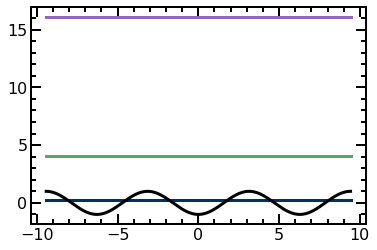

In [248]:
for state_idx in range(5):
    plt.plot(phi, abs(waveFunc[:,state_idx]))
plt.plot(phi,-np.cos(phi), color = 'k')